In [ ]:
#Import libraries

import pandas as pd
import numpy as np
import sklearn as sk
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!pip install gdown

In [ ]:
import gdown
import zipfile
import os
folder_id = '1H-O9HLPPmVIYhCzJbsDIvbmNttZfdkYu'

url = f"https://drive.google.com/drive/folders/{folder_id}?usp=sharing"

gdown.download_folder(f"https://drive.google.com/drive/folders/{folder_id}", quiet=False)

Retrieving folder contents


Processing file 1wfKXCkrrV--z5HdqIIQEptO8YlYKpUed Copy of Dataset.xlsx
Processing file 1bvKvK6lUc_6uv-H4JxU4SyuyXUl7HMVb Dataset.xlsx


Retrieving folder contents completed
Building directory structure
Building directory structure completed
Downloading...
From: https://drive.google.com/uc?id=1wfKXCkrrV--z5HdqIIQEptO8YlYKpUed
To: /content/data/Copy of Dataset.xlsx
100%|██████████| 693k/693k [00:00<00:00, 14.0MB/s]
Downloading...
From: https://drive.google.com/uc?id=1bvKvK6lUc_6uv-H4JxU4SyuyXUl7HMVb
To: /content/data/Dataset.xlsx
100%|██████████| 693k/693k [00:00<00:00, 9.25MB/s]
Download completed


['/content/data/Copy of Dataset.xlsx', '/content/data/Dataset.xlsx']

In [ ]:
nba = pd.read_excel('/content/data/Dataset.xlsx')
print(nba.head())

  Team     Match Up   Game Date W/L  MIN  PTS  FGM  FGA   FG%  3PM  ...   FT%  \
0  GSW  GSW vs. PHX  10/24/2023   L  240  104   36  101  35.6   10  ...  78.6   
1  PHX    PHX @ GSW  10/24/2023   W  240  108   42   95  44.2   11  ...  76.5   
2  LAL    LAL @ DEN  10/24/2023   L  240  107   41   90  45.6   10  ...    75   
3  DEN  DEN vs. LAL  10/24/2023   W  240  119   48   91  52.7   14  ...    75   
4  MEM  MEM vs. NOP  10/25/2023   L  240  104   38   91  41.8   12  ...    80   

   OREB  DREB  REB AST  STL  BLK  TOV  PF  +/-  
0    18    31   49  19   11    6   11  23   -4  
1    17    43   60  23    5    7   19  22    4  
2    13    31   44  23    5    4   12  18  -12  
3     9    33   42  29    9    6   12  15   12  
4     8    29   37  23    8    7   13  19   -7  

[5 rows x 24 columns]


In [ ]:
#Cleaning Data
  # create home and away vars -> Make match up column more usable
  # Win loss ->1/0

nba['Game Date'] = pd.to_datetime(nba['Game Date'])
home_left = nba['Match Up'][nba['Match Up'].str.contains('vs.')]
home_right = nba['Match Up'][nba['Match Up'].str.contains('@')]
home_1 = home_left.str.split(' vs. ', expand=True)[0]
away_1 = home_left.str.split(' vs. ', expand=True)[1]
home_2 = home_right.str.split(' @ ', expand = True)[1]
away_2 = home_right.str.split(' @ ', expand=True)[0]
home = pd.concat([home_1, home_2]).sort_index()
away = pd.concat([away_1, away_2]).sort_index()
nba['Home'] = home
nba['Away'] = away
nba['Is_Home'] = nba['Team'] == nba['Home']
#nba['W/L'] = (nba['W/L'] == 'W').astype('int')
nba['FT%'] = pd.to_numeric(nba['FT%'], errors='coerce')
nba[nba['FT%'].isna()]
nba['FT%'][2368] = 0
nba['W/L'].value_counts()#

<ipython-input-47-e2a241847301>:20: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  nba['FT%'][2368] = 0
<ipython-input-47-e2a241847301>:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the ca

,count
W/L,
L,1230
W,1230


In [ ]:
plt.figure(figsize=(8, 5))
sns.boxplot(x='Is_Home', y='PTS', data=nba, palette='Set2')

# Customize plot
plt.title('Boxplot of Points (PTS) Based on Home/Away')
plt.xlabel('Is Home')
plt.ylabel('Points (PTS)')

# Show the plot
plt.tight_layout()
plt.savefig("ptshomeaway.png", format='png', dpi=300)  # Adjust dpi for better resolution
plt.close()
from google.colab import files
files.download("ptshomeaway.png")

<ipython-input-60-54e24d260127>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Is_Home', y='PTS', data=nba, palette='Set2')


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:

# Create the corrected pivot table
heatmap_data = nba.pivot_table(nba,  columns=['Is_Home'],index='W/L', aggfunc='size', fill_value=0)

# Create a heatmap
plt.figure(figsize=(8, 5))
sns.heatmap(heatmap_data, annot=True, cmap=['#ABC7FC', '#F6B99C'], fmt='d', cbar=False)

# Customize the plot
plt.title('Heatmap of Wins/Losses vs. Home/Away')
#plt.xlabel('Is Home')
#plt.ylabel('Win/Loss')

# Show the plot
plt.tight_layout()
#plt.show()

plt.savefig("heatmap.png", format='png', dpi=300)  # Adjust dpi for better resolution
plt.close()
from google.colab import files
files.download("heatmap.png")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
# Trying to work out variable importance for recency
from sklearn.linear_model import Lasso
from sklearn.preprocessing import StandardScaler

lasso = Lasso()
X_vars = nba[['FG%', '3P%', 'FT%', 'OREB', 'DREB', 'REB', 'AST', 'STL', 'BLK', 'TOV', 'PF', '+/-']]
y_var = nba['PTS']
scalar = StandardScaler()
X_vars = scalar.fit_transform(X_vars)

x_var_names = ['FG%', '3P%', 'FT%', 'OREB', 'DREB', 'REB', 'AST', 'STL', 'BLK', 'TOV', 'PF', '+/-']
lasso.fit(X_vars, y_var)
print(lasso.coef_)

[ 6.46815342  1.52351353  0.71635799  1.63169487  0.          0.28372459
  1.85521425  0.          0.         -1.43895894  1.05336539  1.32767573]


In [ ]:
  # weight for recency
# stability column --> variation between points, or other variables
import datetime

def stability(team, date, length=datetime.timedelta(weeks=1)):
    start_date = date - length
    data = nba[(nba['Team'] == team) & (nba['Game Date'] >= start_date) & (nba['Game Date'] <= date)]
    # print(data)

    if len(data) < 3:
        return np.nan
    else:
        data = data.drop(columns=['Team', 'Match Up', 'Game Date', 'W/L', 'MIN', 'Home', 'Away', 'Is_Home'])
        # print(data.std().mean())
        # data = scalar.fit_transform(data)
        avg_std = data.std().mean()
        return avg_std


print(stability('LAL', datetime.datetime(2024, 4, 14)))

nba['Stability'] = nba.apply(lambda row: stability(row['Team'], row['Game Date']), axis=1)
nba

3.9888342641572874


,Team,Match Up,Game Date,W/L,MIN,PTS,FGM,FGA,FG%,3PM,...,AST,STL,BLK,TOV,PF,+/-,Home,Away,Is_Home,Stability
0,GSW,GSW vs. PHX,2023-10-24,0,240,104,36,101,35.6,10,...,19,11,6,11,23,-4,GSW,PHX,True,NaN
1,PHX,PHX @ GSW,2023-10-24,1,240,108,42,95,44.2,11,...,23,5,7,19,22,4,GSW,PHX,False,NaN
2,LAL,LAL @ DEN,2023-10-24,0,240,107,41,90,45.6,10,...,23,5,4,12,18,-12,DEN,LAL,False,NaN
3,DEN,DEN vs. LAL,2023-10-24,1,240,119,48,91,52.7,14,...,29,9,6,12,15,12,DEN,LAL,True,NaN
4,MEM,MEM vs. NOP,2023-10-25,0,240,104,38,91,41.8,12,...,23,8,7,13,19,-7,MEM,NOP,True,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2455,CLE,CLE vs. CHA,2024-04-14,0,240,110,44,93,47.3,16,...,30,4,1,14,8,-10,CLE,CHA,True,4.879878
2456,NYK,NYK vs. CHI,2024-04-14,1,265,120,46,91,50.5,12,...,27,7,6,21,17,1,NYK,CHI,True,5.190367
2457,LAC,LAC vs. HOU,2024-04-14,0,240,105,41,104,39.4,8,...,23,13,8,12,14,-11,LAC,HOU,True,5.920997
2458,LAL,LAL @ NOP,2024-04-14,1,240,124,48,87,55.2,11,...,32,12,3,15,13,16,NOP,LAL,False,3.988834


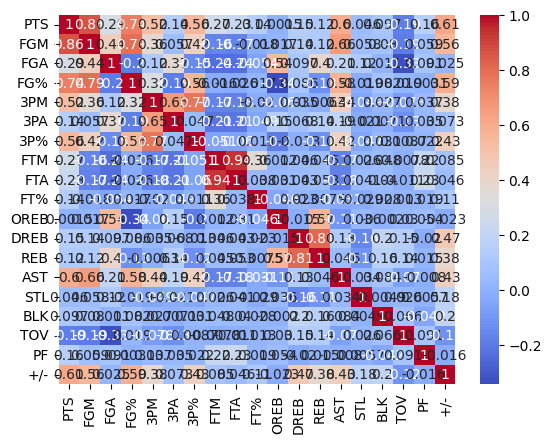

           PTS       FGM       FGA       FG%       3PM       3PA       3P%  \
PTS   1.000000  0.864809  0.292205  0.744538  0.522214  0.144216  0.558592   
FGM   0.864809  1.000000  0.441141  0.790209  0.361830  0.056803  0.421624   
FGA   0.292205  0.441141  1.000000 -0.196488  0.115008  0.366430 -0.147676   
FG%   0.744538  0.790209 -0.196488  1.000000  0.316147 -0.186162  0.562602   
3PM   0.522214  0.361830  0.115008  0.316147  1.000000  0.654216  0.773635   
3PA   0.144216  0.056803  0.366430 -0.186162  0.654216  1.000000  0.047059   
3P%   0.558592  0.421624 -0.147676  0.562602  0.773635  0.047059  1.000000   
FTM   0.271636 -0.163987 -0.238024 -0.015898 -0.169015 -0.214708 -0.050708   
FTA   0.232166 -0.173773 -0.238216 -0.026108 -0.176437 -0.213290 -0.060423   
FT%   0.144741 -0.017650 -0.054472  0.016873 -0.019728 -0.049387  0.010742   
OREB  0.001502  0.016609  0.543577 -0.344794 -0.059861  0.152218 -0.196522   
DREB  0.148213  0.140147  0.097325  0.086240  0.034584  0.068115

In [ ]:
nba_numeric = nba.drop(columns=['Team', 'Match Up', 'Game Date', 'W/L', 'MIN', 'Home', 'Away', 'Is_Home'])
corr_matrix = nba_numeric.corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.show()
print(corr_matrix)

In [ ]:
#vif
#Feature selection

In [ ]:
#logistic regression



Accuracy: 0.8394308943089431
              precision    recall  f1-score   support

           0       0.86      0.82      0.84       246
           1       0.82      0.86      0.84       246

    accuracy                           0.84       492
   macro avg       0.84      0.84      0.84       492
weighted avg       0.84      0.84      0.84       492



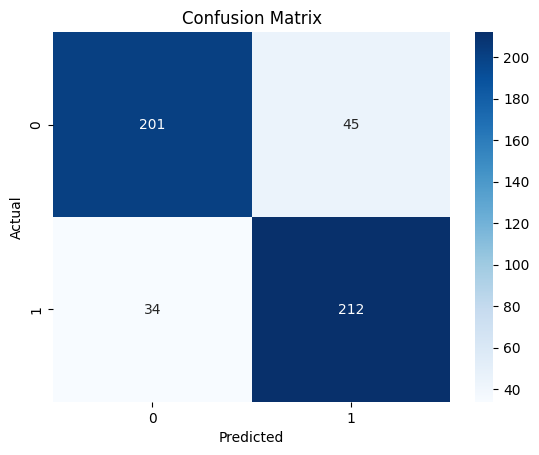

In [ ]:
# SVM
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Feature Selection (example - you might want to adjust based on your analysis)

features = ['FG%', '3P%', 'FT%', 'OREB', 'DREB', 'REB', 'AST', 'STL', 'BLK', 'TOV', 'PF', 'Stability', 'Is_Home']
X = nba[features]
y = nba['W/L']

# Handle missing values (if any) - Imputation or removal
X = X.fillna(0) # Replace with a more sophisticated imputation method if necessary

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2) # Adjust test_size and random_state as needed

# Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Train an SVM model
svm_model = SVC(kernel='linear', C=1) # Adjust kernel and C as needed
svm_model.fit(X_train_scaled, y_train)

# Make predictions on the test set
y_pred = svm_model.predict(X_test_scaled)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")

print(classification_report(y_test, y_pred))

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()
# QDA
# Random Forest

Accuracy: 0.8272357723577236
              precision    recall  f1-score   support

           0       0.84      0.81      0.82       246
           1       0.82      0.85      0.83       246

    accuracy                           0.83       492
   macro avg       0.83      0.83      0.83       492
weighted avg       0.83      0.83      0.83       492



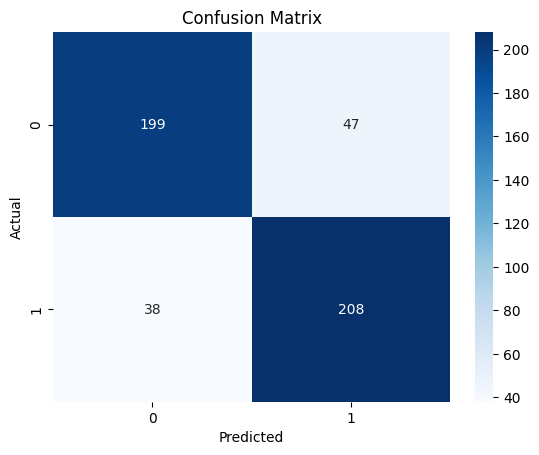

In [ ]:
# XG Boost

import xgboost as xgb

# Train an XGBoost model
xgb_model = xgb.XGBClassifier(objective='binary:logistic') # Added random_state
xgb_model.fit(X_train_scaled, y_train)

# Make predictions
y_pred = xgb_model.predict(X_test_scaled)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")

print(classification_report(y_test, y_pred))

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

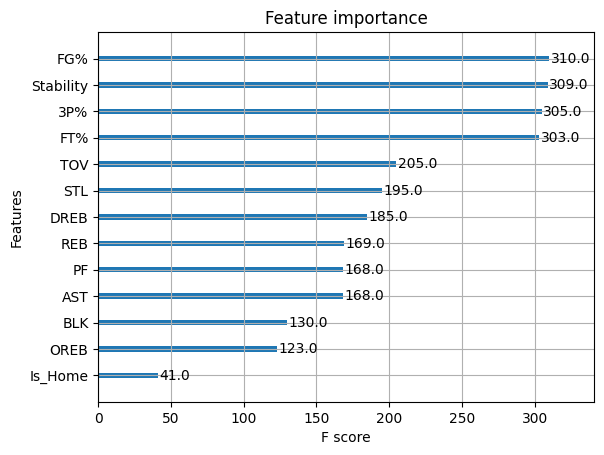

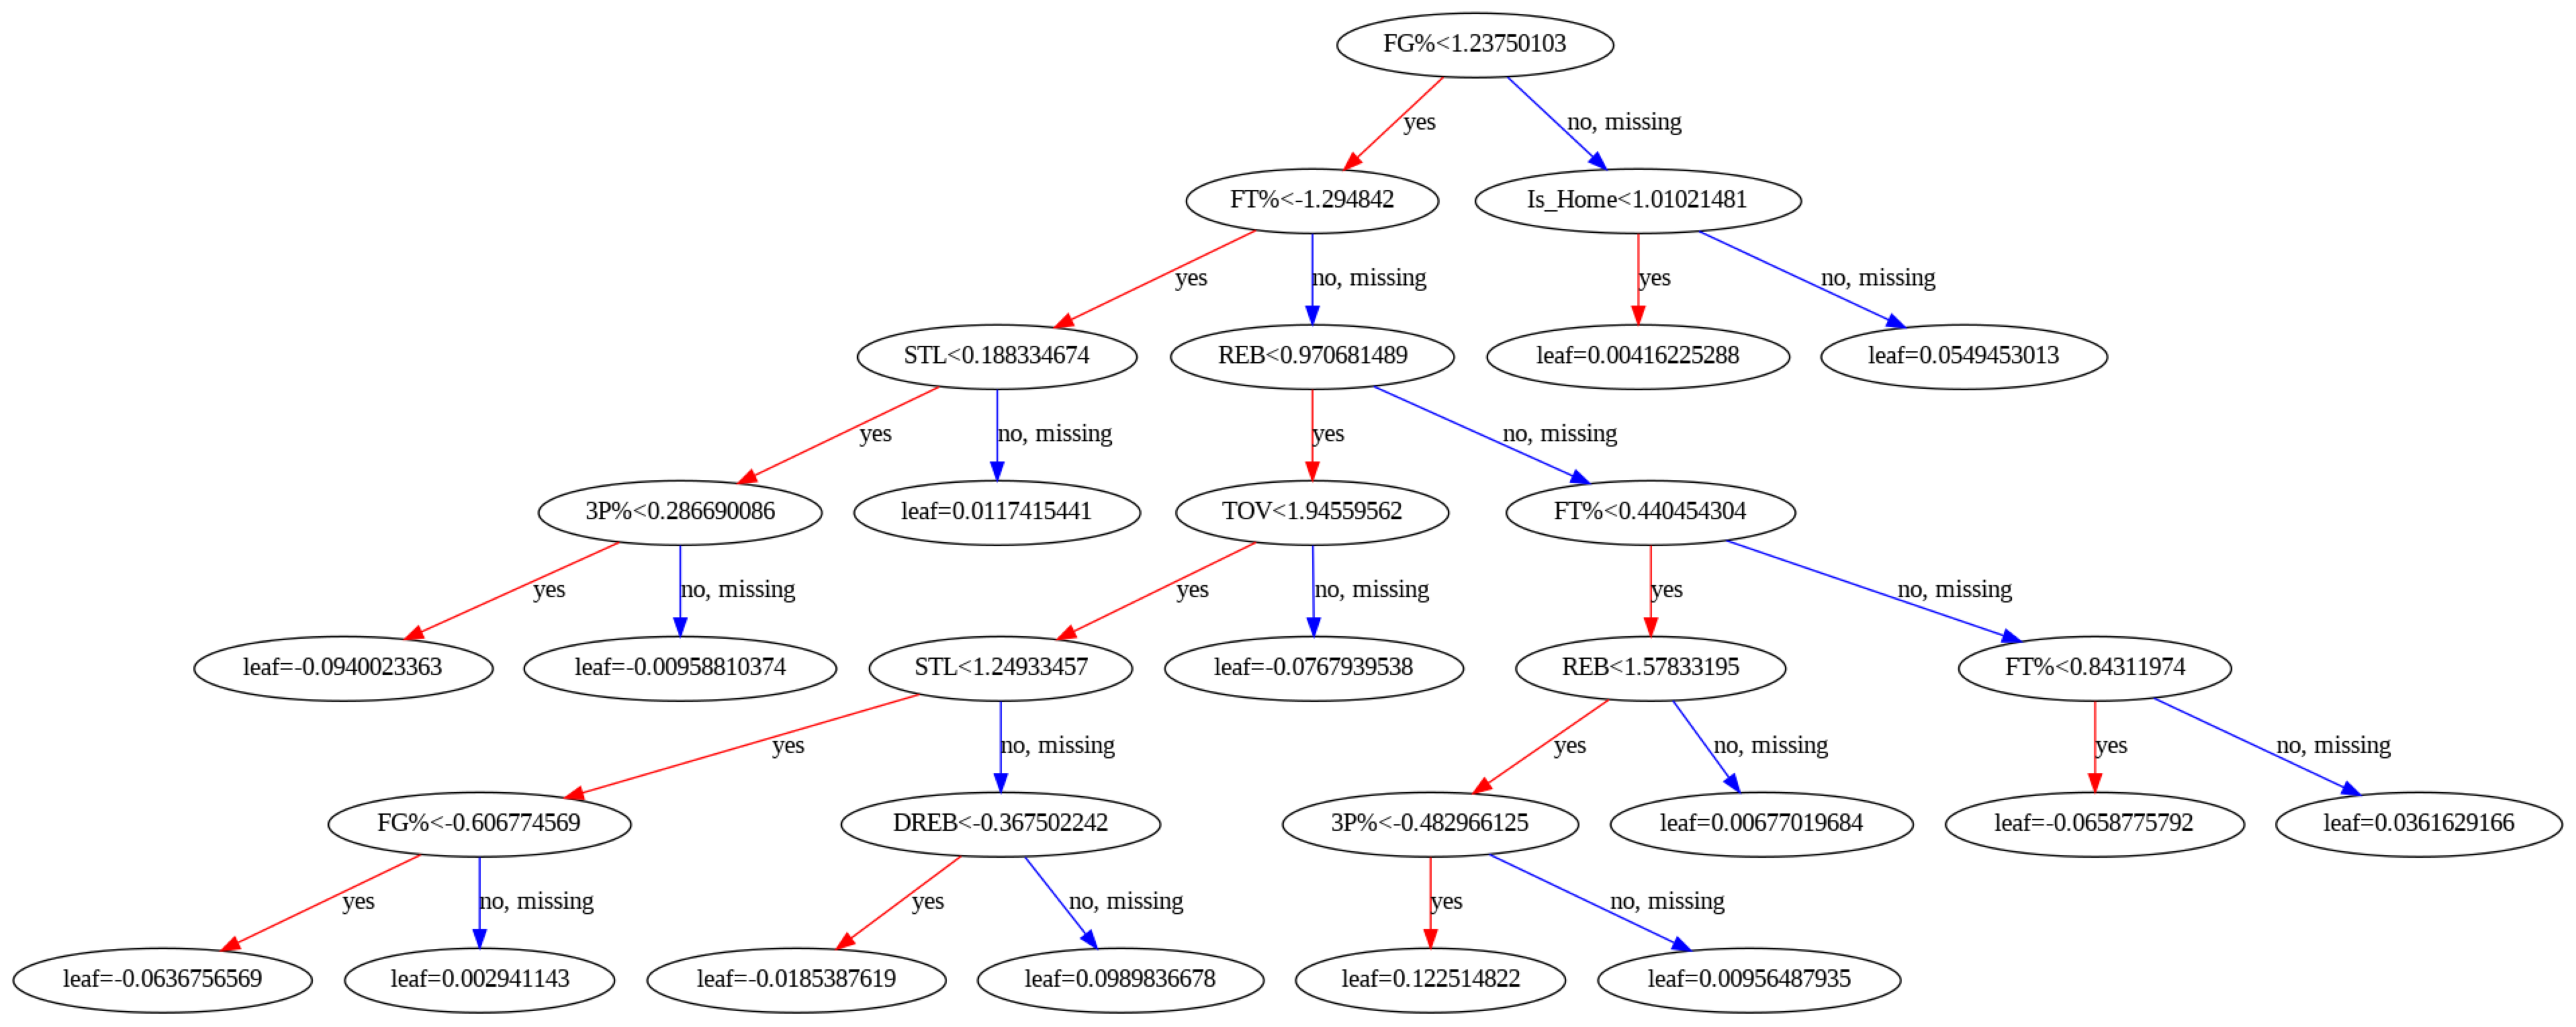

In [ ]:
xgb_model.get_booster().feature_names = features
xgb.plot_importance(xgb_model)
plt.show()

total_trees = xgb_model.get_booster().num_boosted_rounds()
#print(total_trees)
fig, ax = plt.subplots(figsize=(50, 50))
xgb.plot_tree(xgb_model, num_trees= total_trees-1, ax=ax)
plt.show()

In [ ]:
#Condensed Code Chunk with Helper Functions

from scipy.optimize import minimize

def prev_game_info(data, team, date, time_dif = datetime.timedelta(weeks = 5), opp_games = False, prev_matchup = False, team_2 = 'None'):
  if opp_games:
    return data[((data['Home'] == team) | (data['Away'] == team)) & (data['Team'] != team) & (data['Game Date'] < date) & (data['Game Date'] >= date - time_dif)][:5]
  if prev_matchup:
    return data[(data['Team'] == team) & ((data['Home'] == team_2) | (data['Away'] == team_2)) & (data['Game Date'] < date) & (data['Game Date'] >= date - time_dif)][:5]
  return data[(data['Team'] == team) & (data['Game Date'] < date) & (data['Game Date'] >= date - time_dif)][:5]

def all_prev_game_set(data, team, date):
  try:
    game_dates = data[(data['Team'] == team)]['Game Date'][5:-1]
  except:
    return 'Not enough games'

  X_list = []
  y_list = []
  for game_date in game_dates:
    game_data = prev_game_info(nba, team, game_date)
    feature_data = game_data.drop(columns=non_features)  # Remove non-feature columns
    X_list.append(feature_data.values)  # Convert to numpy array
    y_list.append(nba[(nba['Team'] == team) & (nba['Game Date'] == game_date)]['PTS'].values[0])
  X = np.stack(X_list, axis=1)  # Shape: (n, k, m)
  y = np.array(y_list)
  return X, y

def pt_pred_model(X, y):
  n, k, m = X.shape
  def objective(params, y, X):
    n, k, m = X.shape
    # Split parameters into w and B
    w = params[:n].reshape(-1, 1)  # First n elements are w
    B = params[n:]                # Remaining elements are B
    # Compute predictions
    predictions = np.einsum('n,nkm,m->k', w.flatten(), X, B)
    # Compute squared residuals
    loss = np.linalg.norm(y - predictions)**2
    return loss
  constraints = [
    {'type': 'eq', 'fun': lambda params: np.sum(params[:n]) - 1},  # Sum-to-one for w
    {'type': 'ineq', 'fun': lambda params: params[:n]}            # Non-negativity for w
    ]
  w_init = np.random.rand(n)
  w_init /= w_init.sum()  # Ensure sum-to-one
  B_init = np.random.rand(m)

  params_init = np.concatenate([w_init, B_init])

  res = minimize(
    objective,
    params_init,
    args=(y, X),
    method='SLSQP',
    constraints=constraints,
    options={'maxiter': 1000, 'ftol': 1e-8}
  )

  params_opt = res.x
  w_opt = params_opt[:n]
  B_opt = params_opt[n:]
  return w_opt, B_opt

def pt_pred(X, w_opt, B_opt):
  predictions = np.einsum('n,nkm,m->k', w_opt.flatten(), X, B_opt)
  return predictions

def find_test_pts(data, team, date, games = 1):
  game_dates = nba[(nba['Team'] == team) & (nba['Game Date'] == date)]['Game Date']
  game_dates = game_dates[-games:]

  X_list = []
  y_list = []

  for game_date in game_dates:
    game_data = prev_game_info(nba, team, game_date)
    feature_data = game_data.drop(columns=non_features)  # Remove non-feature columns
    X_list.append(feature_data.values)  # Convert to numpy array
    y_list.append(nba[(nba['Team'] == team) & (nba['Game Date'] == game_date)]['PTS'].values[0])

  X = np.stack(X_list, axis=1)  # Shape: (n, k, m)
  y = np.array(y_list)
  return X, y

def point_prediction_model(data, team_1, team_2, date):
  X_train_1, y_train_1 = all_prev_game_set(data, team_1, date)
  w_opt_1, B_opt_1 = pt_pred_model(X_train_1, y_train_1)
  X_test_1, y_test_1 = find_test_pts(data, team_1, date)
  team_1_pts = pt_pred(X_test_1, w_opt_1, B_opt_1)

  X_train_2, y_train_2 = all_prev_game_set(data, team_2, date)
  w_opt_2, B_opt_2 = pt_pred_model(X_train_2, y_train_2)
  X_test_2, y_test_2 = find_test_pts(data, team_2, date)
  team_2_pts = pt_pred(X_test_2, w_opt_2, B_opt_2)

  if team_1_pts > team_2_pts:
    return 1
  else:
    return 0

In [ ]:
#Running the Model
  #TAKES 18 MIN TO RUN!!! -> DO NOT RERUN UNLESS YOU WANT TO WAIT 20 MIN

non_features = ['Team', 'Home', 'Away', 'Match Up', 'W/L', 'Game Date', 'Stability', 'PTS', 'FGM', 'FGA', 'FTM', 'FTA', '3PM', '3PA']

nba_test = nba[2000:]

predictions = []
for i in nba_test.index:
  if nba_test.loc[i, 'Home'] == nba_test.loc[i, 'Team']:
    predictions.append(point_prediction_model(nba, nba_test.loc[i, 'Team'], nba_test.loc[i, 'Away'], nba_test.loc[i, 'Game Date']))
  else:
    predictions.append(point_prediction_model(nba, nba_test.loc[i, 'Team'], nba_test.loc[i, 'Home'], nba_test.loc[i, 'Game Date']))

nba_test['Predictions'] = predictions
print(nba_test)
accuracy = 1 - abs(nba_test['W/L'] - nba_test['Predictions']).mean()
print(accuracy)

In [ ]:
#Try to do an ARIMA next week if score bad!!!

#Otherwise IGNORE ALL CODE BELOW THIS POINT!!!
  #DO NOT RUN CODE BELOW!!!

In [ ]:
#Self-Designed

#offensive_features = ['FG%', '3P%', 'FT%', 'OREB', 'REB', 'AST', 'TOV']
#defensive_features = ['DREB', 'STL', 'BLK', 'REB', 'PF']

#def offense_lasso(data, ignore = ['Team', 'Match Up', 'Game Date', 'W/L', 'MIN', 'Home', 'Away', 'STL', 'BLK', 'DREB', '+/-', 'PF', 'FGM', 'FGA', 'FTM', 'FTA', '3PM', '3PA', 'Stability', 'Is_Home']):
#  data = data.drop(columns=ignore)
#  data = data.fillna(0)
#  lasso = Lasso()
#  X_vars = data.drop(columns=['PTS'])
#  x_var_names = X_vars.columns
#  y_var = data['PTS']
#  scalar = StandardScaler()
#  X_vars = scalar.fit_transform(X_vars)

#  lasso.fit(X_vars, y_var)
#  return pd.DataFrame(lasso.coef_, index = x_var_names)

#def defense_lasso(data, ignore = ['Team', 'Match Up', 'Game Date', 'W/L', 'MIN', 'Home', 'Away', '+/-', 'FGM', 'FGA', 'FTM', 'FTA', '3PM', '3PA', 'FG%', 'FT%', '3P%', 'OREB', 'AST', 'Stability', 'Is_Home', 'TOV']):
#  data = data.drop(columns=ignore)
#  data = data.fillna(0)
#  lasso = Lasso()
#  X_vars = data.drop(columns=['PTS'])
#  x_var_names = X_vars.columns
#  y_var = data['PTS']
#  scalar = StandardScaler()
#  X_vars = scalar.fit_transform(X_vars)

 # lasso.fit(X_vars, y_var)
 # return pd.DataFrame(lasso.coef_, index = x_var_names)


#def comparative_model(data, team_1, team_2, date, decay_rate = 0.001):
#  decay_rate = decay_rate
#  team_1_games = data[(data['Team'] == team_1) & (data['Game Date'] < date)]
#  team_2_games = data[(data['Team'] == team_2) & (data['Game Date'] < date)]
#  team_1_numeric = team_1_games.drop(columns=['Team', 'Match Up', 'Game Date', 'W/L', 'MIN', 'Home', 'Away', '+/-', 'FGM', 'FGA', 'FTM', 'FTA', '3PM', '3PA', 'Stability', 'Is_Home'])
#  team_2_numeric = team_2_games.drop(columns=['Team', 'Match Up', 'Game Date', 'W/L', 'MIN', 'Home', 'Away', '+/-', 'FGM', 'FGA', 'FTM', 'FTA', '3PM', '3PA', 'Stability', 'Is_Home'])
#  team_1_opp_games = pd.merge(data[((data['Home'] == team_1) | (data['Away'] == team_1)) & (data['Team'] != team_1) & (data['Game Date'] < date)][['PTS', 'Game Date']], team_1_games.drop(columns='PTS'), on='Game Date')
#  team_2_opp_games = pd.merge(data[((data['Home'] == team_2) | (data['Away'] == team_2)) & (data['Team'] != team_2) & (data['Game Date'] < date)][['PTS', 'Game Date']], team_2_games.drop(columns='PTS'), on='Game Date')
#  team_1_off_rating = offense_lasso(team_1_games)
#  team_2_off_rating = offense_lasso(team_2_games)
#  team_1_def_rating = defense_lasso(team_1_opp_games)
#  team_2_def_rating = defense_lasso(team_2_opp_games)
#  team_1_time_dif = (date - team_1_games['Game Date']).dt.days
#  team_2_time_dif = (date - team_2_games['Game Date']).dt.days
#  team_1_weights =  np.exp(-decay_rate * team_1_time_dif)
#  team_1_weights /= team_1_weights.sum()
#  team_2_weights =  np.exp(-decay_rate * team_2_time_dif)
#  team_2_weights /= team_2_weights.sum()
#  team_1_time_weighted = pd.DataFrame(team_1_numeric.apply(lambda col: np.average(col, weights=team_1_weights), axis=0)).T
#  team_2_time_weighted = pd.DataFrame(team_2_numeric.apply(lambda col: np.average(col, weights=team_2_weights), axis=0)).T
  #team_1_std = scalar.fit_transform(team_1_time_weighted)
  #team_2_std = scalar.fit_transform(team_2_time_weighted)
  #print(team_1_time_weighted)
#  team_1_pred = (team_1_time_weighted[offensive_features].dot(team_1_off_rating.values) + team_2_time_weighted[defensive_features].dot(team_2_def_rating.values))
#  team_2_pred = (team_2_time_weighted[offensive_features].dot(team_2_off_rating.values) + team_1_time_weighted[defensive_features].dot(team_1_def_rating.values))
  #if (team_1_off_rating + abs(team_1_def_rating)) > (team_2_off_rating + abs(team_2_def_rating)):
  #  print(f'{team_1} is better than {team_2}')
  #print(team_1_off_rating)
  #print(team_2_off_rating)
  #print(team_1_def_rating)
  #print(team_2_def_rating)
  #print(team_1_time_weighted[offensive_features] * team_1_off_rating.T)
  #print(team_1_pred)
  #print(team_2_pred)
#  if team_1_pred[0][0] > team_2_pred[0][0]:
#    return 1
#  else:
#    return 0


#print(comparative_model(nba, 'LAL', 'NOP', datetime.datetime(2024, 4, 14)))
#print(comparative_model(nba, 'NOP', 'LAL', datetime.datetime(2024, 4, 14)))

#nba_test = nba.iloc[2000:][['Team', 'W/L', 'Home', 'Away', 'Game Date']]

#prediction = []

#for i in nba_test.index:
#  team_1 = nba_test.loc[i, 'Team']
#  date = nba_test.loc[i, 'Game Date']
#  if nba_test.loc[i, 'Home'] == team_1:
#    team_2 = nba_test.loc[i, 'Away']
#  else:
#    team_2 = nba_test.loc[i, 'Home']
#  prediction.append(comparative_model(nba, team_1, team_2, date))

#nba_test['Prediction'] = prediction
#print(1 - (abs(nba_test['Prediction'] - nba_test['W/L']).mean()))
#Note for self: Come back to this, try GD to mess with weights maybe to see if that helps

In [ ]:
#Mathematical Approach/GD

from sklearn.linear_model import LinearRegression

unused = ['Team', 'Home', 'Away', 'Match Up', 'W/L', 'Game Date', 'Stability', 'FGM', 'FGA', 'FTM', 'FTA', '3PM', '3PA']

def prev_game_info(data, team, date, time_dif = datetime.timedelta(weeks = 5), opp_games = False, prev_matchup = False, team_2 = 'None'):
  if opp_games:
    return data[((data['Home'] == team) | (data['Away'] == team)) & (data['Team'] != team) & (data['Game Date'] < date) & (data['Game Date'] >= date - time_dif)][:5]
  if prev_matchup:
    return data[(data['Team'] == team) & ((data['Home'] == team_2) | (data['Away'] == team_2)) & (data['Game Date'] < date) & (data['Game Date'] >= date - time_dif)][:5]
  return data[(data['Team'] == team) & (data['Game Date'] < date) & (data['Game Date'] >= date - time_dif)][:5]

def lin_reg_pts(data, team, date, weights, predict = False):
  weights = weights.reshape(-1, 1)
  prev_games = prev_game_info(data, team, date)
  prev_games = prev_games.drop(columns=unused)
  X_vars = prev_games.drop(columns=['PTS'])
  y_var = prev_games['PTS']
  #scalar = StandardScaler()
  #X_vars = scalar.fit_transform(X_vars)
  lin_reg = LinearRegression()
  lin_reg.fit(X_vars, y_var)
  #print(lin_reg.coef_)
  #print(pd.DataFrame(lin_reg.coef_, index = X_vars.columns))
  current_game = prev_game_info(nba, team, date).drop(columns=['Team', 'Home', 'Away', 'Match Up', 'W/L', 'Game Date', 'Stability', 'PTS', 'FGM', 'FGA', 'FTM', 'FTA', '3PM', '3PA'])
  #print(pd.DataFrame(current_game.mean()))
  #print(np.matmul(pd.DataFrame(current_game).T, weights).T)
  weighted_game = pd.DataFrame(np.matmul(pd.DataFrame(current_game).T, weights), index = X_vars.columns).T
  y_pred = lin_reg.predict(weighted_game)
  if predict:
    return y_pred #WRONG: Change to time-weighted average
  return lin_reg.coef_

def time_weights(data, team, date):
  #Write function to min weights relative to time dif and use lin regression to predict
  #Want: Current pts = All past data * time weights
  pts = data[data['Team'] == team]['PTS']
  pred_data = prev_game_info(data, team, date)
  time_dif = (date - pred_data['Game Date']).dt.days
  pred_data = pred_data.drop(columns=unused)

  return 0

def point_prediction(data, team_1, team_2, date, weights_1, weights_2):
  team_1_pts = lin_reg_pts(data, team_1, date, weights_1, predict = True)
  team_2_pts = lin_reg_pts(data, team_2, date, weights_2, predict = True)
  if team_1_pts > team_2_pts:
    return 1
  else:
    return 0 #Need to write more helper functions

#print(point_prediction(nba, 'LAL', 'NOP', datetime.datetime(2024, 4, 14)))
#nba_test = nba[2000:]
#pred = []
#for i in nba_test.index:
#  if nba_test.loc[i, 'Home'] == nba_test.loc[i, 'Team']:
#    pred.append(point_prediction(nba, nba_test.loc[i, 'Team'], nba_test.loc[i, 'Away'], nba_test.loc[i, 'Game Date']))
#  else:
#    pred.append(point_prediction(nba, nba_test.loc[i, 'Team'], nba_test.loc[i, 'Home'], nba_test.loc[i, 'Game Date']))
#nba_test['Predictions'] = pred
#accuracy = 1 - abs(nba_test['Predictions'] - nba_test['W/L']).mean()
#print(accuracy) #Bro what??? Lowkey cooked, this is actually a really good accuracy lol NVM

In [ ]:
#Ignore stuff below, not working well
#Trying ARIMA now - time based regression



In [ ]:
#Optimizing w, B together
  # min_w,B ||y - w^TXB||_2^2
from scipy.optimize import minimize
non_features = ['Team', 'Home', 'Away', 'Match Up', 'W/L', 'Game Date', 'Stability', 'PTS', 'FGM', 'FGA', 'FTM', 'FTA', '3PM', '3PA']

X = prev_game_info(nba, 'LAL', datetime.datetime(2024, 4, 12)).drop(columns = non_features)
n = len(X)
y = nba[(nba['Team'] == 'LAL') & (nba['Game Date'] == datetime.datetime(2024, 4, 12))]['PTS'].values[0]
w = np.random.rand(n)
m = len(X.columns)
B = np.random.rand(m)
def obj_w(w, y, X, B):
  return np.linalg.norm(y - w.T @ X @ B) ** 2
def obj_B(B, y, X, w):
  return np.linalg.norm(y - w.T @ X @ B) ** 2
constraints = [{'type': 'eq', 'fun': lambda w: np.sum(w) - 1},
               {'type': 'ineq', 'fun': lambda w: w}]
tol = 1e-8
max_it = 1000
y.reshape(-1,1)
for i in range(max_it):
    # Optimize w
    res_w = minimize(obj_w, w, args=(y, X, B), method='SLSQP', tol=tol, constraints=constraints)
    w_new = res_w.x

    # Update B via direct optimization
    def obj_B(B):
        return (y - np.dot(w_new, np.dot(X, B)))**2  # Scalar objective

    res_B = minimize(obj_B, B, method='BFGS', tol=tol)
    B_new = res_B.x

    # Check for convergence
    if np.linalg.norm(w_new - w) < tol and np.linalg.norm(B_new - B) < tol:
        print(i)
        break

    # Update w and B
    w = w_new
    B = B_new
def obj_B(B, y, X, w):
  return np.linalg.norm(y - w.T @ X @ B) ** 2
print(w)
print(B)
print(obj_w(w, y, X, B))
print(obj_B(B, y, X, w))
print(w.T @ X @ B)
print(y)
print(X)
#Now, try for new datapoint
y_test = nba[(nba['Team'] == 'LAL') & (nba['Game Date'] == datetime.datetime(2024, 4, 14))]['PTS'].values[0]
X_test = prev_game_info(nba, 'LAL', datetime.datetime(2024, 4, 14)).drop(columns=non_features)
print(X_test)
print(w.T @ X_test @ B)
print(y_test)

In [ ]:
#Initializing tensor X

# Define game dates
game_dates = [
    datetime.datetime(2024, 3, 13),
    datetime.datetime(2024, 3, 16),
    datetime.datetime(2024, 3, 18),
    datetime.datetime(2024, 3, 22),
    datetime.datetime(2024, 3, 24),
    datetime.datetime(2024, 3, 26),
    datetime.datetime(2024, 3, 27),
    datetime.datetime(2024, 3, 29),
    datetime.datetime(2024, 3, 31),
    datetime.datetime(2024, 4, 2),
    datetime.datetime(2024, 4, 3),
    datetime.datetime(2024, 4, 6),
    datetime.datetime(2024, 4, 7),
    datetime.datetime(2024, 4, 9)
]

game_dates = nba[(nba['Team'] == 'LAL')]['Game Date'][5:-1]

# Initialize list for game matrices
X_list = []
y_list = []

for game_date in game_dates:
    # Extract features for the given game
    game_data = prev_game_info(nba, 'LAL', game_date)
    feature_data = game_data.drop(columns=non_features)  # Remove non-feature columns
    X_list.append(feature_data.values)  # Convert to numpy array
    y_list.append(nba[(nba['Team'] == 'LAL') & (nba['Game Date'] == game_date)]['PTS'].values[0])

# Stack into a tensor
X = np.stack(X_list, axis=1)  # Shape: (n, k, m)
print("Shape of X:", X.shape)  # Should print (n, k, m)
y = np.array(y_list)
print(y)

In [ ]:
#New Attempt: Utilizing multiple games, X as a tensor

def objective(params, y, X):
    n, k, m = X.shape
    # Split parameters into w and B
    w = params[:n].reshape(-1, 1)  # First n elements are w
    B = params[n:]                # Remaining elements are B
    # Compute predictions
    predictions = np.einsum('n,nkm,m->k', w.flatten(), X, B)
    # Compute squared residuals
    loss = np.linalg.norm(y - predictions)**2
    return loss
constraints = [
    {'type': 'eq', 'fun': lambda params: np.sum(params[:n]) - 1},  # Sum-to-one for w
    {'type': 'ineq', 'fun': lambda params: params[:n]}            # Non-negativity for w
    ]
w_init = np.random.rand(n)
w_init /= w_init.sum()  # Ensure sum-to-one
B_init = np.random.rand(m)

# Combine into a single parameter vector
params_init = np.concatenate([w_init, B_init])
from scipy.optimize import minimize

res = minimize(
    objective,
    params_init,
    args=(y, X),
    method='SLSQP',
    constraints=constraints,
    options={'maxiter': 1000, 'ftol': 1e-8}
)

# Extract optimized w and B
params_opt = res.x
w_opt = params_opt[:n]
B_opt = params_opt[n:]
predictions = np.einsum('n,nkm,m->k', w_opt.flatten(), X, B_opt)
predictions

array([111.69257598803935, 111.69257598803935, 111.69257598803935,
       111.69257598803935, 111.69257598803935, 111.69257598803935,
       111.69257598803935, 111.69257598803935, 111.69257598803935,
       111.69257598803935, 111.69257598803935, 111.69257598803935,
       111.69257598803935, 116.04151682454027, 116.04151682454027,
       112.44288998085166, 117.54046695300651, 120.58579111428408,
       118.38405086383172, 118.38405086383172, 109.2788073326477,
       109.04190249699849, 107.22976041257053, 111.23945425534129,
       122.7763901402256, 117.19330696429482, 118.4230745285452,
       118.4230745285452, 116.95387438274587, 116.44871834008977,
       112.25958661565794, 117.30105523414917, 117.30105523414917,
       120.09710615196963, 121.21003179035274, 121.21003179035274,
       130.6494673341765, 129.24551192328897, 123.04659007008608,
       118.15530084516978, 127.4428036476227, 133.03852283721872,
       121.22930305504029, 115.27362565678402, 115.27362565678402,
 

In [ ]:
#Just to find test cases and test the test cases

# Define game dates
game_dates = [
    datetime.datetime(2024, 4, 12),
    datetime.datetime(2024, 4, 14)
]
game_dates = nba[(nba['Team'] == 'LAL')]['Game Date'][81:]

# Initialize list for game matrices
X_list = []
y_list = []

for game_date in game_dates:
    # Extract features for the given game
    game_data = prev_game_info(nba, 'LAL', game_date)
    feature_data = game_data.drop(columns=non_features)  # Remove non-feature columns
    X_list.append(feature_data.values)  # Convert to numpy array
    y_list.append(nba[(nba['Team'] == 'LAL') & (nba['Game Date'] == game_date)]['PTS'].values[0])

# Stack into a tensor
X = np.stack(X_list, axis=1)  # Shape: (n, k, m)
print("Shape of X:", X.shape)  # Should print (n, k, m)
y = np.array(y_list)
print(y)

print(np.einsum('n,nkm,m->k', w_opt.flatten(), X, B_opt)) #Works better! Let's test on a larger dataset

In [ ]:
from scipy.optimize import minimize
def all_prev_game_set(data, team, date):
  try:
    game_dates = data[(data['Team'] == team)]['Game Date'][5:-1]
  except:
    return 'Not enough games'

  X_list = []
  y_list = []
  for game_date in game_dates:
    game_data = prev_game_info(nba, team, game_date)
    feature_data = game_data.drop(columns=non_features)  # Remove non-feature columns
    X_list.append(feature_data.values)  # Convert to numpy array
    y_list.append(nba[(nba['Team'] == team) & (nba['Game Date'] == game_date)]['PTS'].values[0])
  X = np.stack(X_list, axis=1)  # Shape: (n, k, m)
  y = np.array(y_list)
  return X, y

def pt_pred_model(X, y):
  def objective(params, y, X):
    n, k, m = X.shape
    # Split parameters into w and B
    w = params[:n].reshape(-1, 1)  # First n elements are w
    B = params[n:]                # Remaining elements are B
    # Compute predictions
    predictions = np.einsum('n,nkm,m->k', w.flatten(), X, B)
    # Compute squared residuals
    loss = np.linalg.norm(y - predictions)**2
    return loss
  constraints = [
    {'type': 'eq', 'fun': lambda params: np.sum(params[:n]) - 1},  # Sum-to-one for w
    {'type': 'ineq', 'fun': lambda params: params[:n]}            # Non-negativity for w
    ]
  w_init = np.random.rand(n)
  w_init /= w_init.sum()  # Ensure sum-to-one
  B_init = np.random.rand(m)

  params_init = np.concatenate([w_init, B_init])

  res = minimize(
    objective,
    params_init,
    args=(y, X),
    method='SLSQP',
    constraints=constraints,
    options={'maxiter': 1000, 'ftol': 1e-8}
  )

  params_opt = res.x
  w_opt = params_opt[:n]
  B_opt = params_opt[n:]
  return w_opt, B_opt

def pt_pred(X, w_opt, B_opt):
  predictions = np.einsum('n,nkm,m->k', w_opt.flatten(), X, B_opt)
  return predictions

def find_test_pts(data, team, date, games = 1):
  game_dates = nba[(nba['Team'] == team) & (nba['Game Date'] == date)]['Game Date']
  game_dates = game_dates[-games:]

  X_list = []
  y_list = []

  for game_date in game_dates:
    game_data = prev_game_info(nba, team, game_date)
    feature_data = game_data.drop(columns=non_features)  # Remove non-feature columns
    X_list.append(feature_data.values)  # Convert to numpy array
    y_list.append(nba[(nba['Team'] == team) & (nba['Game Date'] == game_date)]['PTS'].values[0])

  X = np.stack(X_list, axis=1)  # Shape: (n, k, m)
  y = np.array(y_list)
  return X, y

In [ ]:
X_train, y_train = all_prev_game_set(nba, 'CLE', datetime.datetime(2024, 4, 14))
w_opt, B_opt = pt_pred_model(X_train, y_train)
X_test, y_test = find_test_pts(nba, 'CLE', datetime.datetime(2024, 4, 14), 1)
print(pt_pred(X_test, w_opt, B_opt))
print(y_test) #Omg yes it actually works really well now

In [ ]:
#Final helper function to try and put this all together

def point_prediction_model(data, team_1, team_2, date):
  X_train_1, y_train_1 = all_prev_game_set(data, team_1, date)
  w_opt_1, B_opt_1 = pt_pred_model(X_train_1, y_train_1)
  X_test_1, y_test_1 = find_test_pts(data, team_1, date)
  team_1_pts = pt_pred(X_test_1, w_opt_1, B_opt_1)

  X_train_2, y_train_2 = all_prev_game_set(data, team_2, date)
  w_opt_2, B_opt_2 = pt_pred_model(X_train_2, y_train_2)
  X_test_2, y_test_2 = find_test_pts(data, team_2, date)
  team_2_pts = pt_pred(X_test_2, w_opt_2, B_opt_2)

  if team_1_pts > team_2_pts:
    return 1
  else:
    return 0

In [ ]:
point_prediction_model(nba, 'LAC', 'HOU', datetime.datetime(2024, 4, 14)) #YESSSSS OMG IT WORKS!!! -> Trying on the last x games next chunk

In [ ]:
nba_test = nba[2000:]

predictions = []
for i in nba_test.index:
  if nba_test.loc[i, 'Home'] == nba_test.loc[i, 'Team']:
    predictions.append(point_prediction_model(nba, nba_test.loc[i, 'Team'], nba_test.loc[i, 'Away'], nba_test.loc[i, 'Game Date']))
  else:
    predictions.append(point_prediction_model(nba, nba_test.loc[i, 'Team'], nba_test.loc[i, 'Home'], nba_test.loc[i, 'Game Date']))

nba_test['Predictions'] = predictions
nba_test

In [ ]:
print(1 - abs(nba_test['W/L'] - nba_test['Predictions']).mean())

In [ ]:
#GD for Weighting
  #Start with just optimizing for one game

non_features = ['Team', 'Home', 'Away', 'Match Up', 'W/L', 'Game Date', 'Stability', 'PTS', 'FGM', 'FGA', 'FTM', 'FTA', '3PM', '3PA']
team = 'LAL'
date = datetime.datetime(2024, 4, 14)

w_1 = np.full(len(prev_game_info(nba, 'LAL', datetime.datetime(2024, 4, 14)).drop(columns=unused)), 1/len(prev_game_info(nba, 'LAL', datetime.datetime(2024, 4, 14)).drop(columns=unused)))
w_2 = np.full(len(prev_game_info(nba, 'NOP', datetime.datetime(2024, 4, 14)).drop(columns=unused)), 1/len(prev_game_info(nba, 'NOP', datetime.datetime(2024, 4, 14)).drop(columns=unused)))
lr = 0.01
y_actual = nba[(nba['Team'] == 'LAL') & (nba['Game Date'] == datetime.datetime(2024, 4, 14))]['PTS'].values[0]
iterations = 100
def weight_pentalty(weight):
  return np.sum(np.maximum(0, weight[:-1] - weight[1:]))
def primary_loss(y_actual, weight):
  prev_game_data = prev_game_info(nba, team, date).drop(columns=non_features)
  lin_coef = lin_reg_pts(nba, team, date, weight).reshape(-1, 1)
  y_pred = lin_reg_pts(nba, team, date, weight, predict = True).reshape(1, -1)
  weight = weight.reshape(-1, 1)
  loss = (1/len(prev_game_data)) * (y_actual - np.matmul(np.matmul(lin_coef.T, prev_game_data.T), weight)) ** 2
  return loss
def grad_weight_loss(w):
  grad = np.zeros_like(w)
  for i in range(len(w) - 1):
    if w[i] > w[i + 1]:
      grad[i] += 1
      grad[i + 1] -= 1
  return grad
def grad_primary_loss(y_actual, weight):
  #print(lin_reg_pts(nba, team, date, weight).T)
  prev_game_data = prev_game_info(nba, team, date).drop(columns=non_features)
  lin_coef = lin_reg_pts(nba, team, date, weight).reshape(-1, 1)
  y_pred = lin_reg_pts(nba, team, date, weight, predict = True).reshape(1, -1)
  weight = weight.reshape(-1, 1)
  gradient = -2 * primary_loss(y_actual, weight)
  gradient = gradient * np.matmul(lin_coef.T, prev_game_data.T)
  return gradient
print(primary_loss(y_actual, w_1))
#for _ in range(iterations):
#  prime_grad = grad_primary_loss(y_actual, w_1)
#  weight_grad = grad_weight_loss(w_1)
#  total_grad = prime_grad + weight_grad
#  w_1 -= lr * total_grad
print(w_1)
print(y_actual)
print(lin_reg_pts(nba, 'LAL', datetime.datetime(2024, 4, 14), w_1, predict = True))

In [ ]:
#Putting together the dataset

nba_numeric = nba.drop(columns=['Team', 'Match Up', 'Game Date', 'W/L', 'MIN', 'Home', 'Away', 'FGM', 'FGA', 'FTM', 'FTA', '3PM', '3PA', 'Is_Home', '+/-'])
scaled = pd.DataFrame(scalar.fit_transform(nba_numeric), columns = nba_numeric.columns)
nba_num_scaled = pd.concat([nba.drop(columns=['FG%', '3P%', 'FT%', 'BLK', 'STL', 'AST', 'PF', '+/-', 'PTS', 'DREB', 'OREB', 'REB', 'TOV', 'FGM', 'FGA', 'FTM', 'FTA', '3PM', '3PA', 'MIN', 'Stability']), scaled], axis=1)

#Trying a basic dataset
  #For each game, calculate averages of features for that team before that date, then use to predict
  #Averages unweighted rn but could change if we do some optimization for that

new_list = []

for i in nba_num_scaled.index:
  team_date_info = nba_num_scaled.loc[i, ['Team', 'Match Up', 'Game Date', 'Home', 'Away', 'Is_Home', 'W/L']]
  prev_games = prev_game_info(nba_num_scaled, team_date_info['Team'], team_date_info['Game Date']).drop(columns = ['Team', 'Match Up', 'Game Date', 'Home', 'Away', 'W/L', 'Is_Home'])
  if len(prev_games) > 0:
    prev_games.fillna(0, inplace=True)
    prev_games = prev_games.mean()
    prev_games = pd.concat([team_date_info, prev_games])
    new_list.append(prev_games)
  else:
    continue

nba_prev_scaled = pd.DataFrame(new_list)
nba_prev_scaled

In [ ]:
#Other idea: just gather past data and use to train XG Boost or something

nba_prev_xg_boost = nba_prev_scaled.drop(columns=['Team', 'Match Up', 'Game Date', 'Home', 'Away'])
X = nba_prev_xg_boost.drop(columns=['W/L'])
y = nba_prev_xg_boost['W/L']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
features = list(X.columns)

# Train an XGBoost model
xgb_model = xgb.XGBClassifier(objective='binary:logistic') # Added random_state
xgb_model.fit(X_train, y_train)

# Make predictions
y_pred = xgb_model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")

print(classification_report(y_test, y_pred))

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

xgb_model.get_booster().feature_names = features
xgb.plot_importance(xgb_model)
plt.show()

total_trees = xgb_model.get_booster().num_boosted_rounds()
#print(total_trees)
fig, ax = plt.subplots(figsize=(50, 50))
xgb.plot_tree(xgb_model, num_trees= total_trees-1, ax=ax)
plt.show()
#This is not good, could try working with the weights to see if time-weighted averages make a difference but at this point XG Boost isn't looking good

In [ ]:
def train_and_evaluate_models(X, y, scaler,Approach, models):
    """Train and evaluate models using TimeSeriesSplit, handling multicollinearity, and return model metrics."""
    model_metrics = {}

    ### Scaling the data
    X_scaled = scaler.fit_transform(X)
    X_filtered = pd.DataFrame(X_scaled, columns=X.columns)

    tscv = TimeSeriesSplit(n_splits=5)
    for name, model in models.items():
        scores = []
        detailed_reports = []
        for train_index, test_index in tscv.split(X_filtered):
            X_train, X_test = X_filtered.iloc[train_index], X_filtered.iloc[test_index]
            y_train, y_test = y.iloc[train_index], y.iloc[test_index]

            model.fit(X_train, y_train)
            y_pred = model.predict(X_test)
            score = accuracy_score(y_test, y_pred)
            scores.append(score)
            report = classification_report(y_test, y_pred, output_dict=True)
            detailed_reports.append(report)

        avg_score = np.mean(scores)
        model_metrics[name] = {
            'Model': model,
            'CV Scores': scores,
            'Average CV Score': avg_score,
            'Classification Reports': detailed_reports
        }
        print(f"{name} Model Metrics:")
        print("Cross-Validation Scores:", scores)
        print("Average CV Score:", avg_score)
        print("Classification Reports for the last split:")
        print(classification_report(y_test, y_pred))

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, TimeSeriesSplit, StratifiedKFold, cross_val_score, learning_curve
from xgboost import XGBClassifier


train_and_evaluate_models(
    X=nba_prev_xg_boost.drop(columns=['W/L']),
    y=nba_prev_xg_boost['W/L'],
    scaler=StandardScaler(),
    Approach='NA',
    models={"LogisticRegression": LogisticRegression(), "XGBoost": XGBClassifier()}
)

